In [2]:
!pip uninstall -y transformers
!pip install transformers
!pip install accelerate -U
!pip install transformers datasets

Found existing installation: transformers 4.46.3
Uninstalling transformers-4.46.3:
  Successfully uninstalled transformers-4.46.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 83.6 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.3
    Uninstalling tokenizers-0.20.3:
      Successfully uninstalled tokenizers-0.20.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.3/336.3 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.1.1
    Uninstalling accelerate-1.1.1:
      Successfully uninstalled accelerate-1.1.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/CANADA/Study/Sem2/Advanced Deep Learning/Final Project/yelp_sentiment_analysis_LSTM_DistilBERT

/content/drive/MyDrive/CANADA/Study/Sem2/Advanced Deep Learning/Final Project/yelp_sentiment_analysis_LSTM_DistilBERT


In [4]:
import argparse
import yaml
import os
import torch
from scripts.train_distilbert import train_distilbert_model
from utils.data_preprocessing import preprocess_and_split
from utils.utils import my_print
from utils.data_loader import create_dataloader

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [5]:
# Device configuration
device = 'cuda:0' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
my_print(f"Device Used: {device}")

***
Device Used: cuda:0
***


In [6]:
project_root = os.getcwd()

In [7]:
config_path = os.path.join(project_root, "config", "distilbert_config.yaml")

In [8]:
with open(config_path, "r") as file:
        config = yaml.safe_load(file)

In [9]:
# Paths for data
raw_data_path = os.path.join(project_root, "data", "raw", "yelp_reviews.csv")

In [10]:
processed_file_path = preprocess_and_split(
            raw_data_path,
            'distilbert',
            test_size=config.get('test_size', None),
            vocab_size=config.get('vocab_size', None),  # Only LSTM needs vocab_size
            max_len=config.get('max_len', None)
        )

Preprocessing Data
Processed data saved at: /content/drive/MyDrive/CANADA/Study/Sem2/Advanced Deep Learning/Final Project/yelp_sentiment_analysis_LSTM_DistilBERT/data/raw/../processed/data.csv


Generating train split: 0 examples [00:00, ? examples/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Map:   0%|          | 0/9335 [00:00<?, ? examples/s]

Map:   0%|          | 0/1038 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased-finetuned-sst-2-english and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([2]) in the checkpoint and torch.Size([3]) in the model instantiated
- classifier.weight: found shape torch.Size([2, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/content/drive/MyDrive/CANADA/Study/Sem2/Advanced Deep Learning/Final Project/yelp_sentiment_analysis_LSTM_DistilBERT/scripts/train_distilbert.py:45: FutureWarning: `tokenizer` is deprecated and will be remo

Training Start


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,No log,0.361794
2,No log,0.364978
3,No log,0.386517


Latest checkpoint file: /content/drive/MyDrive/CANADA/Study/Sem2/Advanced Deep Learning/Final Project/yelp_sentiment_analysis_LSTM_DistilBERT/data/raw/../processed/../../training_dir/checkpoint-438


Device set to use cuda:0


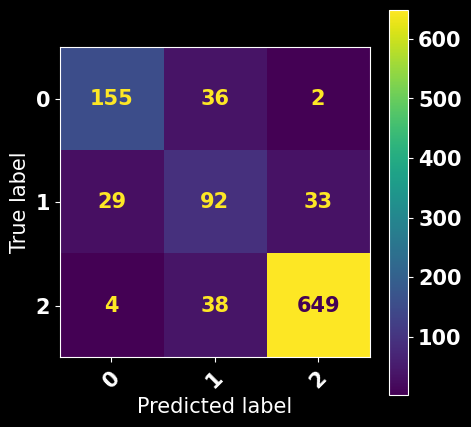

Accuracy :  0.8631984585741811
 
Precision :  0.776
 
Recall :  0.78
 
F1_Score :  0.778
 


In [11]:
train_distilbert_model(
            processed_file_path,
            config.get('epochs', 1),
            config.get('train_batch_size', 16),
            config.get('eval_batch_size', 16),
            device
            )